<a href="https://colab.research.google.com/github/lokesMCI/QuantumVariationalCircuits/blob/main/Classical_FrozenLake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import gym
 import time
 from IPython.display import clear_output

In [ ]:
#env = gym.make("FrozenLake-v0")
env = ShortestPathFrozenLake()

In [ ]:
state_space_size,action_space_size = env.observation_space.n,env.action_space.n

In [ ]:
q_table = np.zeros((state_space_size,action_space_size))

In [ ]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
num_episodes = 10000
max_steps = 1000

learning_rate=0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate= 0.01
exploration_decay_rate = 0.001

In [ ]:
import random
rewards_all_episodes=[]
timestep_reward=[]
iter_index=[]
iter_reward=[]
iter_total_steps=[]

In [ ]:
for episodes in range(num_episodes):
  state = env.reset()
  done=False
  rewards_curr_episode = 0
  t=0
  for steps in range(max_steps):
    exploration_threshold = random.uniform(0,1)
    if exploration_threshold>exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()
    new_state,reward,done,info = env.step(action)
    #print(new_state,reward,done,info,q_table[state,action])
    q_table[state,action] = q_table[state,action]*(1-learning_rate) + learning_rate*(reward+discount_rate*np.max(q_table[new_state,:]))
    state = new_state
    rewards_curr_episode+=reward
    if done==True:
      break
    exploration_rate = min_exploration_rate+(max_exploration_rate-min_exploration_rate)*np.exp(-exploration_decay_rate*episodes)
    t+=1
  rewards_all_episodes.append(rewards_curr_episode)  
  timestep_reward.append(rewards_curr_episode)
  iter_index.append(episodes)
  iter_reward.append(rewards_curr_episode)
  iter_total_steps.append(t)


In [ ]:
len(rewards_all_episodes)

10000

In [ ]:
rewards_split = np.split(np.array(rewards_all_episodes[:10000]),num_episodes/1000)
count=1000
for i in rewards_split:
  print(count,":",str(sum(i/1000)))
  count+=1000

1000 : -0.24093999999999996
2000 : -0.13546999999999984
3000 : 0.006459999999999894
4000 : 0.08965999999999985
5000 : 0.18994999999999948
6000 : 0.2278599999999998
7000 : 0.26643000000000006
8000 : 0.2365099999999994
9000 : 0.20738999999999974
10000 : 0.21074999999999997


In [ ]:
q_table

array([[ 0.08382056,  0.06867668,  0.06868478,  0.06869635],
       [-0.04916481, -0.02109965, -0.04332852,  0.04241882],
       [ 0.02904426, -0.01339735, -0.03591404, -0.02949565],
       [-0.134645  , -0.13318445, -0.13929432, -0.03126691],
       [ 0.12382589, -0.00519486,  0.08901851,  0.04447809],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01235662, -0.08802175, -0.07570555, -0.10794515],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.10509976,  0.12489456,  0.10413774,  0.20979561],
       [ 0.2246441 ,  0.31906528,  0.22543754,  0.2074758 ],
       [ 0.4184098 ,  0.13346492,  0.15149321,  0.11440505],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.27168867,  0.29768782,  0.54982771,  0.13644201],
       [ 0.54720888,  0.70363435,  0.62201598,  0.61203347],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
print(q_table)

[[ 0.08382056  0.06867668  0.06868478  0.06869635]
 [-0.04916481 -0.02109965 -0.04332852  0.04241882]
 [ 0.02904426 -0.01339735 -0.03591404 -0.02949565]
 [-0.134645   -0.13318445 -0.13929432 -0.03126691]
 [ 0.12382589 -0.00519486  0.08901851  0.04447809]
 [ 0.          0.          0.          0.        ]
 [-0.01235662 -0.08802175 -0.07570555 -0.10794515]
 [ 0.          0.          0.          0.        ]
 [ 0.10509976  0.12489456  0.10413774  0.20979561]
 [ 0.2246441   0.31906528  0.22543754  0.2074758 ]
 [ 0.4184098   0.13346492  0.15149321  0.11440505]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.27168867  0.29768782  0.54982771  0.13644201]
 [ 0.54720888  0.70363435  0.62201598  0.61203347]
 [ 0.          0.          0.          0.        ]]


In [ ]:
for episodes in range(5):
  env.reset()
  done=False
  print("########### Episode:",episodes+1)
  time.sleep(1)
  for step in range(max_steps):
    clear_output(wait=True)
    env.render()
    time.sleep(0.3)
    action = np.argmax(q_table[state,:])
    new_state,reward,done,info = env.step(action)
    if done==1:
      clear_output(wait=True)
      env.render()
      if reward==1:
        print("GOAL")
        time.sleep(3)
      else :
        print('Hole...RIP')
        time.sleep(3)
        clear_output(wait=True)
      break

    else:
      state=new_state

env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
GOAL


In [ ]:
def plotTrainingResultReward(_iter_index, _iter_reward, _iter_total_steps, _fileTitle):
  fig, ax = plt.subplots()
  fig.set_figwidth(20)
  fig.set_figheight(5) 
	# plt.yscale('log')
  ax.plot(_iter_index, _iter_reward, '-b', label='Reward')
	# ax.plot(_iter_index, _iter_total_steps, '-r', label='Total Steps')
  leg = ax.legend();
  ax.set(xlabel='Iteration Index', 
         title=_fileTitle)
  fig.savefig(_fileTitle + "_REWARD" + "_"+ datetime.now().strftime("NO%Y%m%d%H%M%S") + ".png")


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pickle

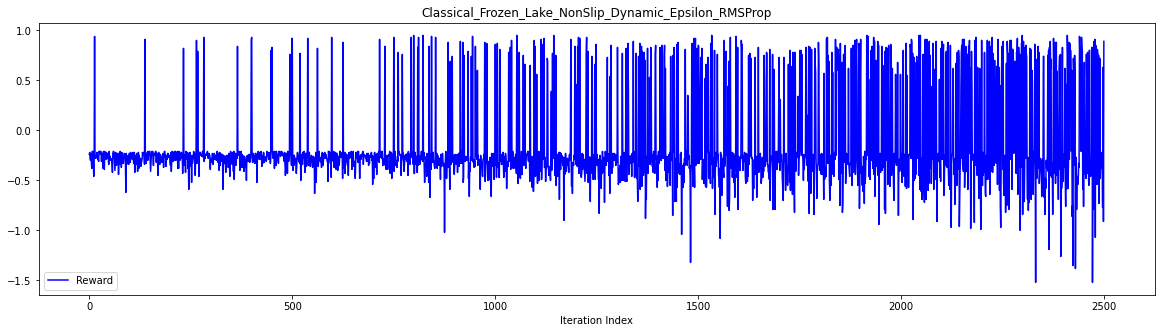

In [ ]:
file_title = 'VQDQN_Frozen_Lake_NonSlip_Dynamic_Epsilon_RMSProp' + datetime.now().strftime("NO%Y%m%d%H%M%S")
	
#plotTrainingResultReward(_iter_index = iter_index[9500:], _iter_reward = iter_reward[9500:], _iter_total_steps = iter_total_steps[9500:], _fileTitle = 'Quantum_DQN_Frozen_Lake_NonSlip_Dynamic_Epsilon_RMSProp')
plotTrainingResultReward(_iter_index = iter_index[:2500], _iter_reward = iter_reward[:2500], _iter_total_steps = iter_total_steps[:2500], _fileTitle = 'Classical_Frozen_Lake_NonSlip_Dynamic_Epsilon_RMSProp')

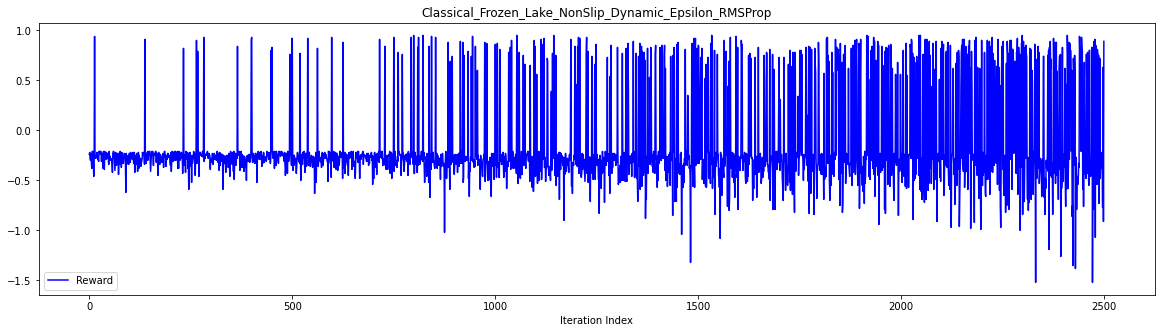

In [ ]:
plotTrainingResultReward(_iter_index = iter_index[:2500], _iter_reward = iter_reward[:2500], _iter_total_steps = iter_total_steps[:2500], _fileTitle = 'Classical_Frozen_Lake_NonSlip_Dynamic_Epsilon_RMSProp')

In [ ]:
import gym
from gym.envs import toy_text

class ShortestPathFrozenLake(toy_text.frozen_lake.FrozenLakeEnv):
	def __init__(self, **kwargs):
		super(ShortestPathFrozenLake, self).__init__(**kwargs)

		for state in range(self.nS): # for all states
			for action in range(self.nA): # for all actions
				my_transitions = []
				for (prob, next_state, _, is_terminal) in self.P[state][action]:
					row = next_state // self.ncol
					col = next_state - row * self.ncol
					tile_type = self.desc[row, col]
					if tile_type == b'H':
						reward = -0.2
					elif tile_type == b'G':
						reward = 1.
					else:
						reward = -0.01

					my_transitions.append((prob, next_state, reward, is_terminal))
				self.P[state][action] = my_transitions

In [ ]:
env = ShortestPathFrozenLake()